In [1]:
import numpy as np
import time
import random
import jax
import jax.numpy as jnp
import sympy as sp
import matplotlib.pyplot as plt
import pandas as pd

***1. How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.***

To multiply a (n, k) and a (k, m) matrix,
$$\text{No. of Multiplications required} = n \times m \times k$$
$$\text{No. of Additions required} = n \times m \times (k-1)$$

This is because, while multiplying two matrix using traditional matrix multiplication,
- We take each row (k elements) from the first matrix and multiply them element-wise from every column (each of k elements) of the second matrix.
- For each pair of row and columns, we add the products i.e., there would be k products and k-1 additions.
- Since this is repeated for m columns for each row and a total of n rows, it results in a total of $n \times m \times k$ mutliplications and $n \times m \times (k-1)$ additions.

***2. Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?***

Example matrix taken :
$$\begin{bmatrix}
1 & 2 \\
3 & 4 \\
5 & 6
\end{bmatrix}
\qquad
\begin{bmatrix}
1 & 2 & 3 & 4 \\
5 & 6 & 7 & 8
\end{bmatrix}
$$


In [2]:
#Using list of lists:

mat1 = [[1, 2], [3, 4], [5, 6]]
mat2 = [[1, 2, 3, 4], [5, 6, 7, 8]]
row, col, k = len(mat1), len(mat2[0]), len(mat1[0])

start = time.time()

res = [[0 for _ in range(col)] for _ in range(row)]
for i in range(row):
  for j in range(col):
    for l in range(k):
      res[i][j] += mat1[i][l] * mat2[l][j]

end = time.time()

for row in res:
  print(row)

print ("Time taken =", round((end - start)*1000, 5),"ms")

[11, 14, 17, 20]
[23, 30, 37, 44]
[35, 46, 57, 68]
Time taken = 0.31066 ms


In [3]:
#Using Numpy

matA = np.array(mat1)
matB = np.array(mat2)

start = time.time()

res = matA @ matB #or np.matmul(A, B)

end = time.time()

for row in res:
  print (row)

print ("Time taken =", round((end - start)*1000, 5),"ms")

[11 14 17 20]
[23 30 37 44]
[35 46 57 68]
Time taken = 0.16093 ms


Matrix Multiplication in python is visibly faster through Numpy than through nested lists.

This is because:
- Numpy is written in C, which is faster than python.
- Instead of processing one element at a time in nested loops, NumPy processes entire arrays.
- NumPy relies on libraries that are made just for fast matrix calculations.
- Numpy organises and used memory in a more faster and efficient way then the overheads of nested lists.
- It is designed for faster calculations of large data.

***3. Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?***

In [4]:
#A random sized array for working upon in this answer
arr = [random.randint(1, 1000) for _ in range(random.randint(9999, 10001))]

Using the first and the most brute force or crude method, it takes O(n) for each pass and for finding the $k^{th}$ highest element, it takes $k$ passes. So for finding the median, which would nearly be the $(n/2)^{th}$ highest element,
Time Complexity will be nearly:
$$
\frac{n}{2} \times O(n) = O(n^2)
$$


In [5]:
def find_kth_largest(arr, k):
    for _ in range(k):
        max_val = max(arr)
        arr.remove(max_val)
    return max_val

start = time.time()

n = len(arr)
k = (n + 1) // 2

if n % 2 == 1:
  print(find_kth_largest(arr.copy(), k))
else:
  mid1 = find_kth_largest(arr.copy(), k)
  mid2 = find_kth_largest(arr.copy(), k + 1)
  print((mid1 + mid2) / 2)

end = time.time()
print("Time taken =", round((end - start)*1000, 5),"ms")

501
Time taken = 2444.33904 ms


A better approach, considering the $O(n^2)$ time complexity of the previous method can be to first sort the array through sorting algorithms like merge sort or quick sort, which use $O(n\text{ }logn)$ to sort and then it would a $O(1)$ operation to find the median.

Resulting overall Time Complexity = $O(n\text{ }logn)$


To implement this in python, we can use the .sort() method which uses Timsort , nearly of the same time complexity as quick sort or merge sort.


In [6]:
arr_copy = arr.copy()

start = time.time()

arr_copy.sort() #takes O(n logn)
n = len(arr)

if (n%2):
  print(arr_copy[n//2])
else:
  print((arr_copy[n//2]+arr_copy[n//2-1])/2)

end = time.time()
print("Time taken =", round((end - start)*1000, 5),"ms")

501
Time taken = 2.73943 ms


Finding median through numpy.median() :

In [7]:
arr_np = np.array(arr)

start = time.time()

med = np.median(arr_np)
print(med)

end = time.time()
print("Time taken =", round((end - start)*1000, 5),"ms")

501.0
Time taken = 1.42074 ms


It can be clearly observed that the first method is extremely slow, slower by nearly a factor of $10^3$, which in turn is expected because of the Time complexity of order $O(n^2)$.

Then, the second algorithm proposed can be seen to be comparatively very efficient, reducing the time drastically. It seems to be the ideal approach.

On deeper analysis it can be found that for large values of data(as the example taken here) numpy.median is faster, though not drastically. But for smaller arrays, the .sort() is quite faster.

This is because the numpy is written with the sole purpose of handling higher computation and large amount of data. Though the basic idea behind the hood is same, it has a slight different sorting algo being used underneath.....thus the difference in the time taken for different sizes of arrays, even though both have time complexity of $O(n logn)$.

Still it cannot be argued that numpy.median is the fastest method for large arrays.

***4. What is the gradient of the following function with respect to x and y?***
$$ x^2 y + y^3 sin(x)$$

The gradient of the function with respect to x and y is given by the corresponding partial derivatives:

$$
\frac{\partial f}{\partial x} = 2xy + y^3 \cos x
$$

$$
\frac{\partial f}{\partial y} = x^2 + 3y^2 \sin x
$$

***5. Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y***

In [8]:
def func(x, y):
  return x**2*y + y**3*jnp.sin(x)
def dfdx_ana(x, y):
  return 2*x*y + y**3*jnp.cos(x)
def dfdy_ana(x, y):
  return x**2 + 3*y**2*jnp.sin(x)

dfdx = jax.grad(func, argnums = 0)
dfdy = jax.grad(func, argnums = 1)

ran_values = [(random.uniform(1, 100), random.uniform(1, 100)) for _ in range(random.randint(3,7))]

for x, y in ran_values:
    print(f"x = {x:.5f}, y = {y:.5f}")
    print(f"  ∂f/∂x - JAX: {dfdx(x, y):.5f}, Analytical: {dfdx_ana(x, y):.5f}")
    print(f"  ∂f/∂y - JAX: {dfdy(x, y):.5f}, Analytical: {dfdy_ana(x, y):.5f}")

x = 1.39609, y = 46.57771
  ∂f/∂x - JAX: 17693.90820, Analytical: 17693.90820
  ∂f/∂y - JAX: 6411.33057, Analytical: 6411.33057
x = 59.32015, y = 53.40275
  ∂f/∂x - JAX: -135648.84375, Analytical: -135648.84375
  ∂f/∂y - JAX: 6613.56641, Analytical: 6613.56641
x = 99.47198, y = 15.99069
  ∂f/∂x - JAX: 5183.78516, Analytical: 5183.78516
  ∂f/∂y - JAX: 9225.86523, Analytical: 9225.86523


***6. Use sympy to confirm that you obtain the same gradient analytically.***

In [9]:
x, y = sp.symbols('x y')
f = x**2 * y + y**3 * sp.sin(x)

df_dx = sp.diff(f, x)
df_dy = sp.diff(f, y)

print("∂f/∂x:", df_dx)
print("∂f/∂y:", df_dy)

∂f/∂x: 2*x*y + y**3*cos(x)
∂f/∂y: x**2 + 3*y**2*sin(x)


These match with the previously analytically computed partial derivatives.

***7. Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks.***

In [10]:
student_data = {
    2022 : {
        "Branch 1" : {
            1 : {
                "Name" : 'N',
                "Marks" : {
                    "Maths" : 100,
                    "English" : 70
                }
            }
        },
        "Branch 2" : {}
    },
    2023 : {
        "Branch 1" : {},
        "Branch 2" : {}
    },
    2024 : {
        "Branch 1" : {},
        "Branch 2" : {}
    },
    2025 : {
        "Branch 1" : {},
        "Branch 2" : {}
    }
}

Further data can be added.....

***8. Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.***

In [11]:
class student:
  def __init__(self, rno, name, marks):
    self.rno = rno
    self.name = name
    self.marks = marks
  def __str__(self):
    return f"{self.rno} ({self.name}) - Marks: {self.marks}"

class Branch:
  def __init__(self, name):
    self.name = name
    self.students = []
  def add_student(self, student):
    self.students.append(student)
  def __str__(self):
    students_str = "\n    ".join(str(s) for s in self.students)
    return f"{self.name}:\n    {students_str}"

class year:
    def __init__(self, year):
        self.year = year
        self.branches = []
    def add_branch(self, branch):
        self.branches.append(branch)
    def __str__(self):
      branches_str = "\n  ".join(str(b) for b in self.branches)
      return f"Year: {self.year}\n  {branches_str}"

class database:
  def __init__(self):
    self.years = []
  def add_year(self, year):
    self.years.append(year)
  def __str__(self):
    return "\n".join(str(year) for year in self.years)

student1 = student(1, 'N', {"Maths": 100, "English": 70})

branch1 = Branch("Branch 1")
branch1.add_student(student1)
branch2 = Branch("Branch 2")
branch3 = Branch("Branch 1")

year1 = year(2022)
year1.add_branch(branch1)
year1.add_branch(branch2)
year2 = year(2023)
year2.add_branch(branch3)
year2.add_branch(branch2)
year3 = year(2024)
year3.add_branch(branch3)
year3.add_branch(branch2)
year4 = year(2025)
year4.add_branch(branch3)
year4.add_branch(branch2)

db = database()
db.add_year(year1)
db.add_year(year2)
db.add_year(year3)
db.add_year(year4)
print(db)

Year: 2022
  Branch 1:
    1 (N) - Marks: {'Maths': 100, 'English': 70}
  Branch 2:
    
Year: 2023
  Branch 1:
    
  Branch 2:
    
Year: 2024
  Branch 1:
    
  Branch 2:
    
Year: 2025
  Branch 1:
    
  Branch 2:
    


***9. Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.***

In [12]:
#Defining the domain
x = np.linspace(0.5, 100.0, 200)

***1)*** $$ y = x $$

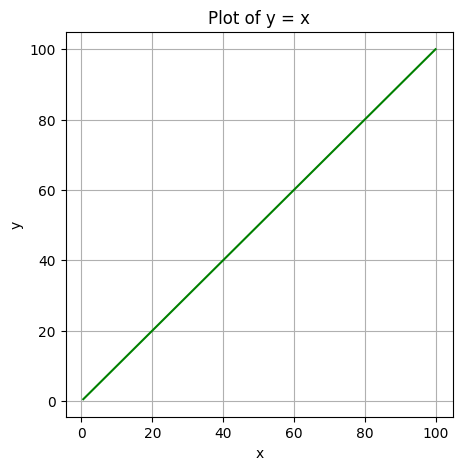

In [13]:
y = x
plt.figure(figsize=(5, 5))
plt.plot(x, y, label='y = x', color='green')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Plot of y = x")
plt.grid(True)
plt.show()

***2)***$$ y = x ^ 2 $$

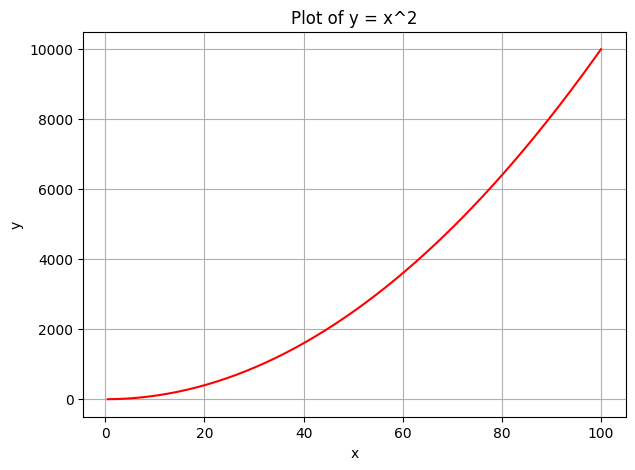

In [14]:
y = x**2
plt.figure(figsize=(7, 5))
plt.plot(x, y, label='y = x', color='red')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Plot of y = x^2")
plt.grid(True)
plt.show()

***3)***$$ y = \frac{x^3}{100} $$

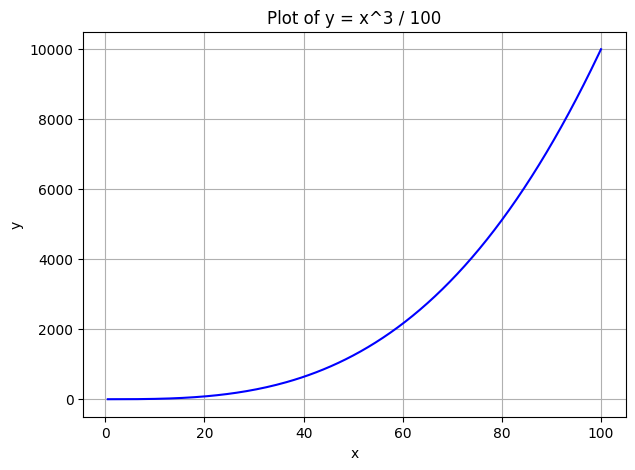

In [15]:
y = x**3/100
plt.figure(figsize=(7, 5))
plt.plot(x, y, label='y = x', color='blue')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Plot of y = x^3 / 100")
plt.grid(True)
plt.show()

***4)***$$ y = sin(x) $$

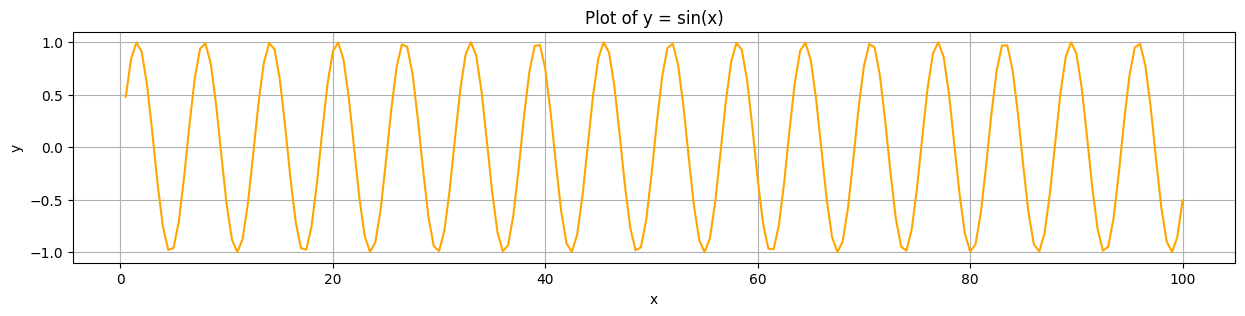

In [16]:
y = np.sin(x)
plt.figure(figsize=(15, 3))
plt.plot(x, y, label='y = x', color='orange')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Plot of y = sin(x)")
plt.grid(True)
plt.show()

***5)***$$ y = \frac{sin(x)}{x} $$

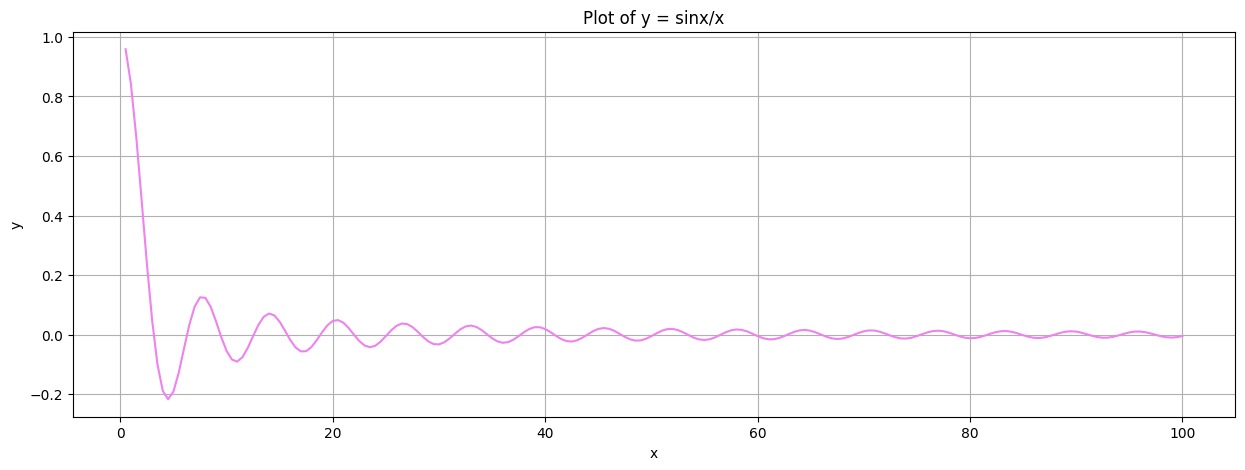

In [17]:
y = np.sin(x)/x
plt.figure(figsize=(15, 5))
plt.plot(x, y, label='y = x', color='violet')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Plot of y = sinx/x")
plt.grid(True)
plt.show()

***6)***$$y = log (x)$$

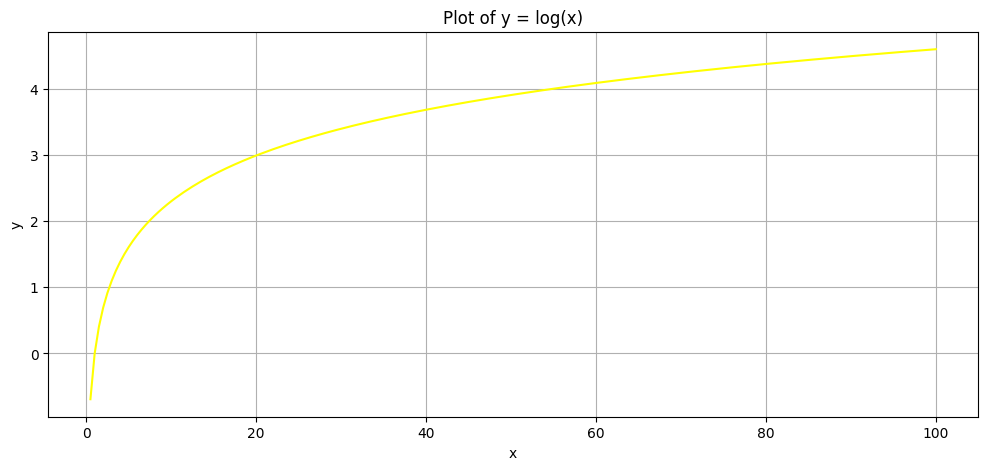

In [18]:
y = np.log(x)
plt.figure(figsize=(12, 5))
plt.plot(x, y, label='y = x', color='yellow')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Plot of y = log(x)")
plt.grid(True)
plt.show()

***7)***$$y = e^x$$

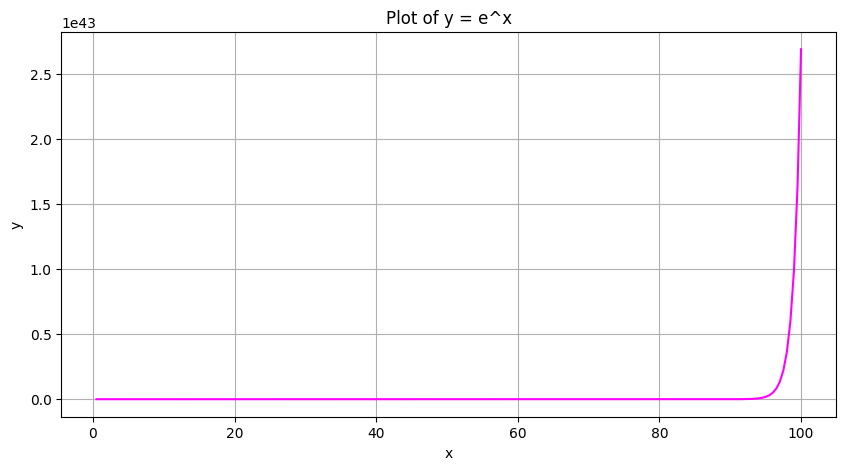

In [19]:
y = np.exp(x)
plt.figure(figsize=(10, 5))
plt.plot(x, y, label='y = x', color='magenta')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Plot of y = e^x")
plt.grid(True)
plt.show()

***10. Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.***

In [20]:
mat = np.random.uniform(1, 2, (20, 5))
df = pd.DataFrame(mat, columns = ["a", "b", "c", "d", "e"])

st_devs = df.std()
print(f"Column with highest standard deviation: {st_devs.idxmax()}")

means = df.mean(axis = 1)
print(f"Index of row with lowest mean: {means.idxmin()}")

Column with highest standard deviation: e
Index of row with lowest mean: 17


***11. Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.***

In [21]:
df["f"] = df["a"] + df["b"] + df["c"] + df["d"] + df["e"]
df["g"] = df["f"].apply(lambda x: "LT8" if x < 8 else "GT8")
df

,a,b,c,d,e,f,g
0,1.603750,1.767086,1.438754,1.728565,1.124265,7.662420,LT8
1,1.329678,1.125221,1.794227,1.678510,1.520312,7.447948,LT8
2,1.528043,1.753784,1.866661,1.269634,1.152838,7.570959,LT8
3,1.223121,1.069538,1.574408,1.846090,1.338784,7.051942,LT8
4,1.313349,1.790898,1.267612,1.172760,1.696977,7.241596,LT8
5,1.586247,1.415551,1.389917,1.637151,1.570919,7.599787,LT8
6,1.634805,1.575020,1.772067,1.477146,1.730121,8.189160,GT8
7,1.162331,1.941349,1.090461,1.536349,1.217976,6.948466,LT8
8,1.056660,1.283918,1.778734,1.689416,1.787262,7.595989,LT8
9,1.209946,1.673551,1.881627,1.844239,1.360091,7.969454,LT8


In [22]:
print(f"No. of rows where g has value LT8 = {df['g'].value_counts()['LT8']}")

No. of rows where g has value LT8 = 15


In [23]:
std_lt8 = df[df["g"] == "LT8"]["f"].std()
std_gt8 = df[df["g"] == "GT8"]["f"].std()

print(f"Standard deviation of f where g = LT8: {std_lt8}")
print(f"Standard deviation of f where g = GT8: {std_gt8}")

Standard deviation of f where g = LT8: 0.4444782857614654
Standard deviation of f where g = GT8: 0.13906841045302393


***12. Write a small piece of code to explain broadcasting in numpy.***

Broadcasting is Numpy's way of automatically adjusting the size of matrices or arrays to perform arithmetic operations, if possible.

For broadcasting to happen, either the dimensions must match or one of them has to be 1.

In [24]:
#Simple Example
#Adding a 2 * 3 matrix with 2*1 matrix
arr1 = np.array([[1, 2, 3], [4, 5, 6]])
arr2 = np.array([[1], [2]])
print(arr1 + arr2)

[[2 3 4]
 [6 7 8]]


Here, it can be seen that the $2 \times 1$ matrix is automatically stretched horizontally to become a $2 \times 3$ matrix, and then the addition is performed. This example demonstrates the basic working of broadcasting in Numpy.

So, in this way, broadcasting can be used to perform arithmetic operations on non-matching matrices if they follow the rule for broadcasting to happen.

***13. Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.***

In [25]:
arr = [random.randint(1, 1000) for _ in range(100)]
min_ind = 0

for i in range(len(arr)):
  if (arr[i]<arr[min_ind]):
    min_ind = i

print(f"argmin through iteration: {min_ind}")
print(f"argmin through numpy.argmin: {np.argmin(arr)}")

argmin through iteration: 31
argmin through numpy.argmin: 31
